# Class Notes - KNN with Python

In [1]:
# First step - Import all libraries that I need.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data into a data frame
df = pd.read_csv('Classified Data',index_col =0)

In [3]:
# Using method head() to explore data
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
# In this case the KNN model basically calculate the distance between points.
# It's important to normalize data in order to avoid wrong decisions due to the order of magnitude of a given data.
# To do this I'll use a tool from skilearn package

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
# This method normalize the orginal dataset.
# Return a array
df_standard = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [18]:
# scaler.Transform returns an array, that will be convert into a DataFrame.
# Data Frame with same columns of the original without the last one (Target Class)
df_param = pd.DataFrame(df_standard, columns=['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test,y_train,y_test = train_test_split(df_param,df['TARGET CLASS'], test_size=0.3)

In [61]:
y_train

125    1
208    0
574    1
991    1
55     0
      ..
333    1
936    1
820    0
990    0
657    1
Name: TARGET CLASS, Length: 700, dtype: int64

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
predict = knn.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       144
           1       0.93      0.92      0.93       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [32]:
print(confusion_matrix(y_test,predict))

[[133  11]
 [ 12 144]]


In [34]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    error_rate.append(np.mean(predict!=y_test))

Text(0, 0.5, 'error rate')

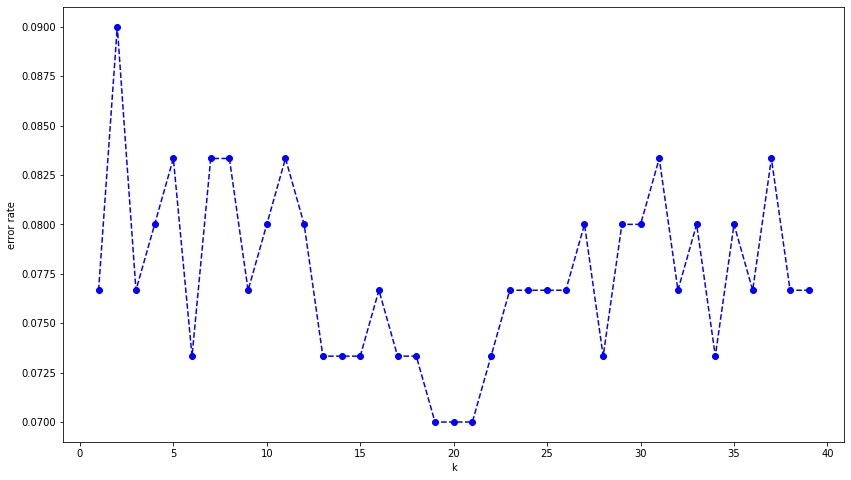

In [39]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle = 'dashed', marker='o')
plt.xlabel('k')
plt.ylabel('error rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
predict = knn.predict(x_test)

In [48]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       144
           1       0.94      0.92      0.93       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[134  10]
 [ 12 144]]
